LOADING MATERIAL DATASET
STARTING PARTICLE SWARM OPTIMIZATION
DONE
(1.2793432395856517, (1.285, 'Trifluoroacetic Acid', 'Liquid'))
(1.8912137207581985, (1.89, 'Lanthanum flint', nan))
(2.7532229255059484, (2.43, 'Copper', 'Liquid'))
963.7691128998359 999.4661493596382 0.96428389647546


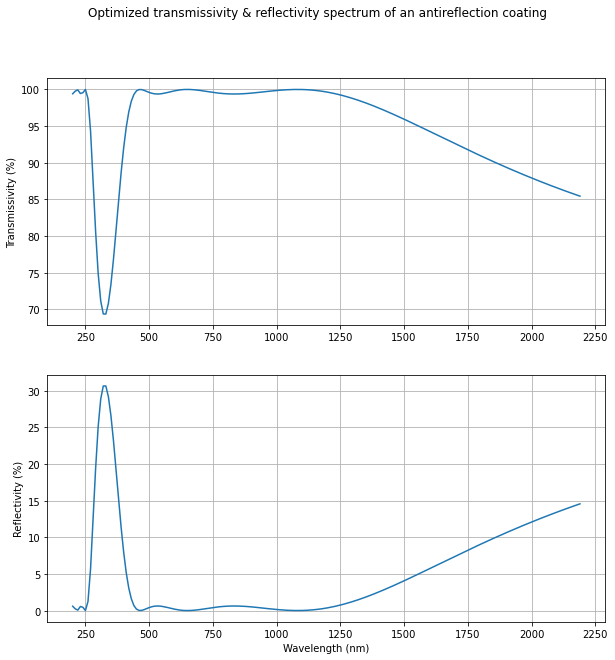

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 
from tmm import TransferMatrixMethod

import operator
import random
from indices_dataset import Dataset
from pso_optimizer import ParticleSwarmOptimizer

print("LOADING MATERIAL DATASET")
dataset = Dataset()

print("STARTING PARTICLE SWARM OPTIMIZATION")
pso = ParticleSwarmOptimizer(3, 1000)
pop, logbook, best = pso.optimize()
print('DONE')

for layer in best:
    print((layer, dataset.get_material(layer)))


layers = len(best)
CENTRAL_WAVELENGTH_AIR = 650 * math.pow(10, -9)
refractive_indices = {"n0": 1.0}
thickness = {}
for l in range(layers):
    refractive_indices["n"+str(l+1)] = best[l]
    thickness["d"+str(l+1)] = 0.25 * (CENTRAL_WAVELENGTH_AIR/best[l])
refractive_indices["n"+str(layers+1)] = 3.5
tmm = TransferMatrixMethod(layers, materials=refractive_indices,
                            thickness=thickness, spectrum_lower=200, spectrum_upper=2200)
candidate_power = tmm.calculate_power(200, 2200)
ideal_power = TransferMatrixMethod.get_ideal_power(200, 2200) 
print(candidate_power, ideal_power, candidate_power/ideal_power)

spectrum = tmm.calculate_spectrum(200,2200)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

fig.suptitle('Optimized transmissivity & reflectivity spectrum of an antireflection coating')
ax1.plot(spectrum["S"], spectrum["T"])
ax1.set(ylabel='Transmissivity (%)')
ax1.grid()

ax2.plot(spectrum["S"], spectrum["R"])
ax2.set(xlabel='Wavelength (nm)', ylabel='Reflectivity (%)')
ax2.grid()
plt.show()